In [1]:
##### This notebook is still buggy for looking at more than one set per calibration run. 
##### It should work fine for only set_0 in each cell. I can make it more user friendly eventually

%reset -sf
import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from Functions import *
from raw_data_class import RawData as RDC
from Functions.plot_average import gather_shots
from processed_data_class import processed_data_class as PDC
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')


Loaded processed_data for run run_216
Loaded processed_data for run run_217
Loaded processed_data for run run_219
Loaded processed_data for run run_221
Loaded processed_data for run run_223
Loaded processed_data for run run_225
Loaded processed_data for run run_227
Loaded processed_data for run run_229
Loaded processed_data for run run_231
Loaded processed_data for run run_233
Loaded processed_data for run run_218
Loaded processed_data for run run_220
Loaded processed_data for run run_222
Loaded processed_data for run run_224
Loaded processed_data for run run_226
Loaded processed_data for run run_228
Loaded processed_data for run run_230
Loaded processed_data for run run_232
Loaded processed_data for run run_234
Loaded processed_data for run run_166
Loaded processed_data for run run_167
Loaded processed_data for run run_170
Loaded processed_data for run run_172
Loaded processed_data for run run_174
Loaded processed_data for run run_176
Loaded processed_data for run run_184
Loaded proce

<IPython.core.display.Javascript object>


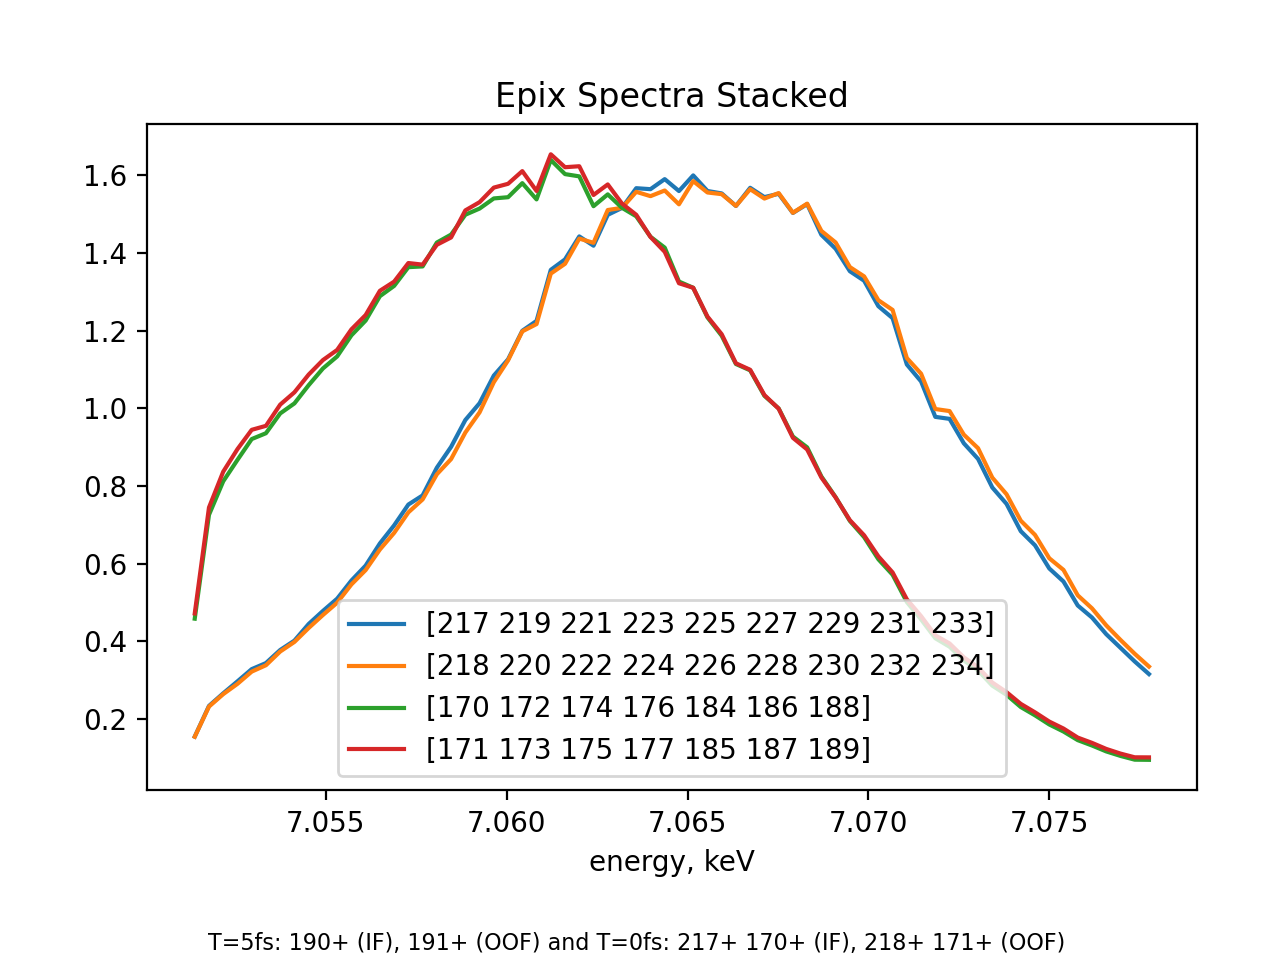

<IPython.core.display.Javascript object>


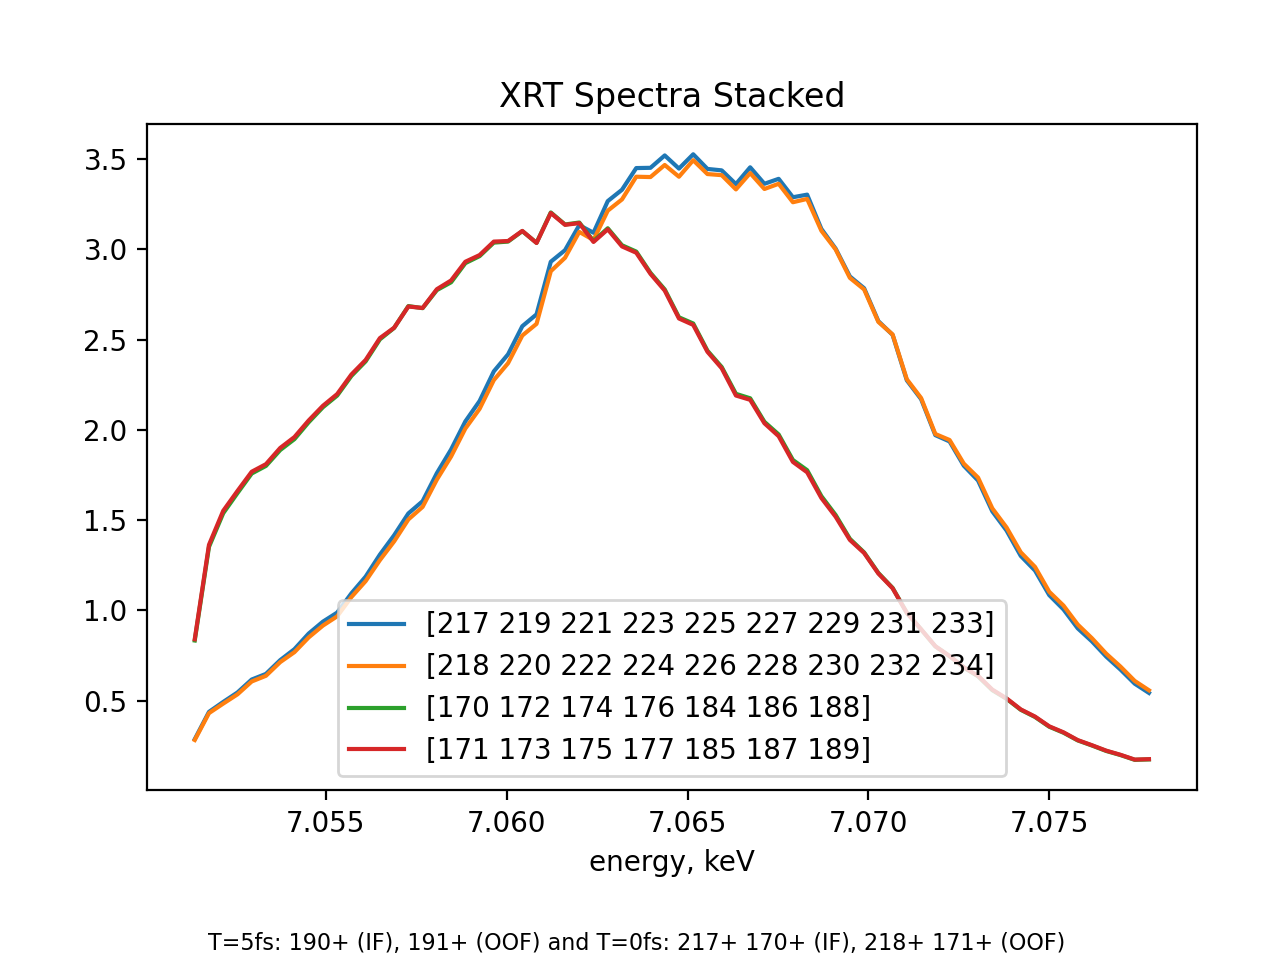

<IPython.core.display.Javascript object>


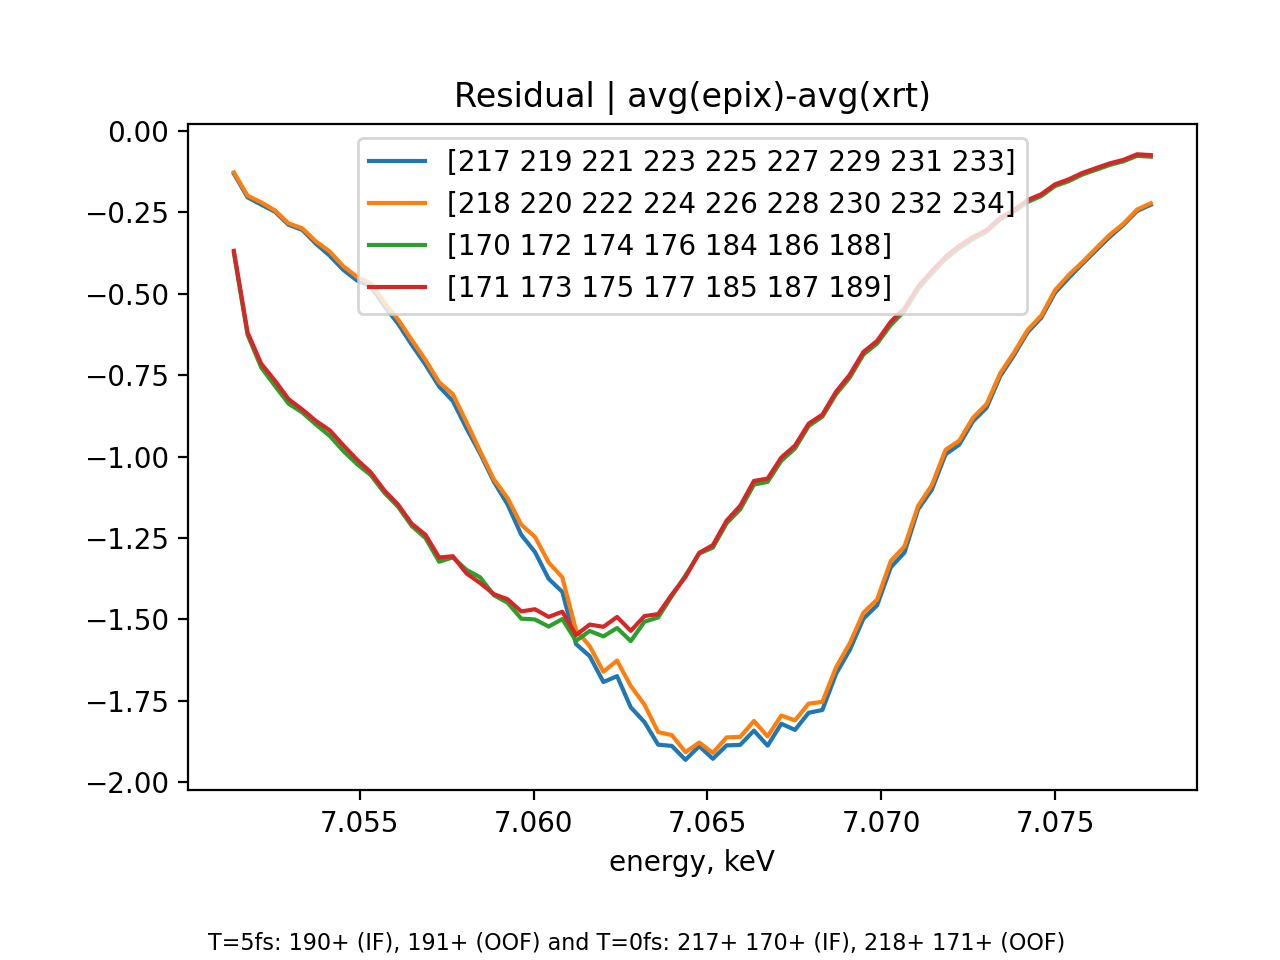

<IPython.core.display.Javascript object>


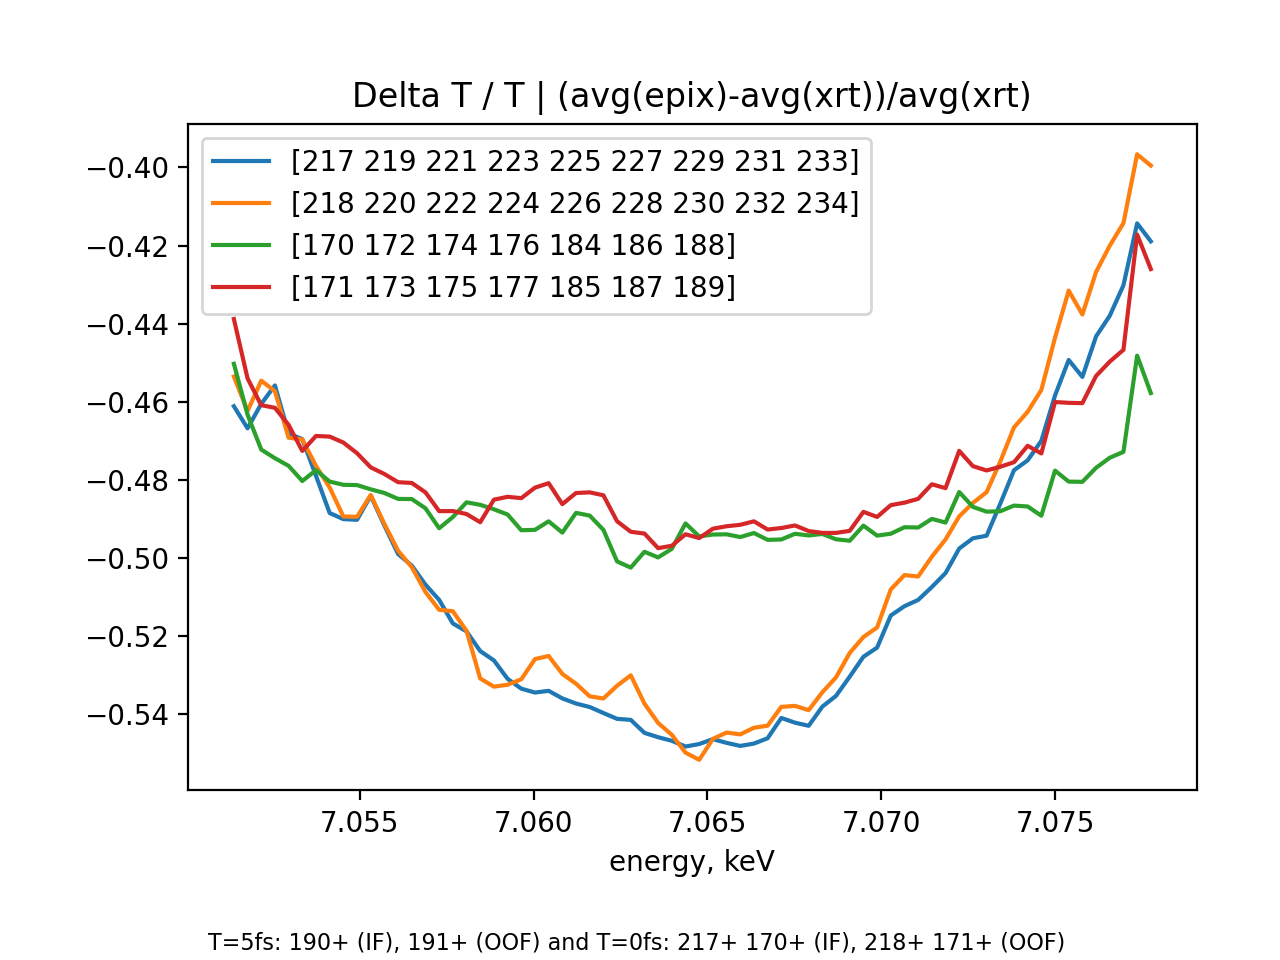

<IPython.core.display.Javascript object>


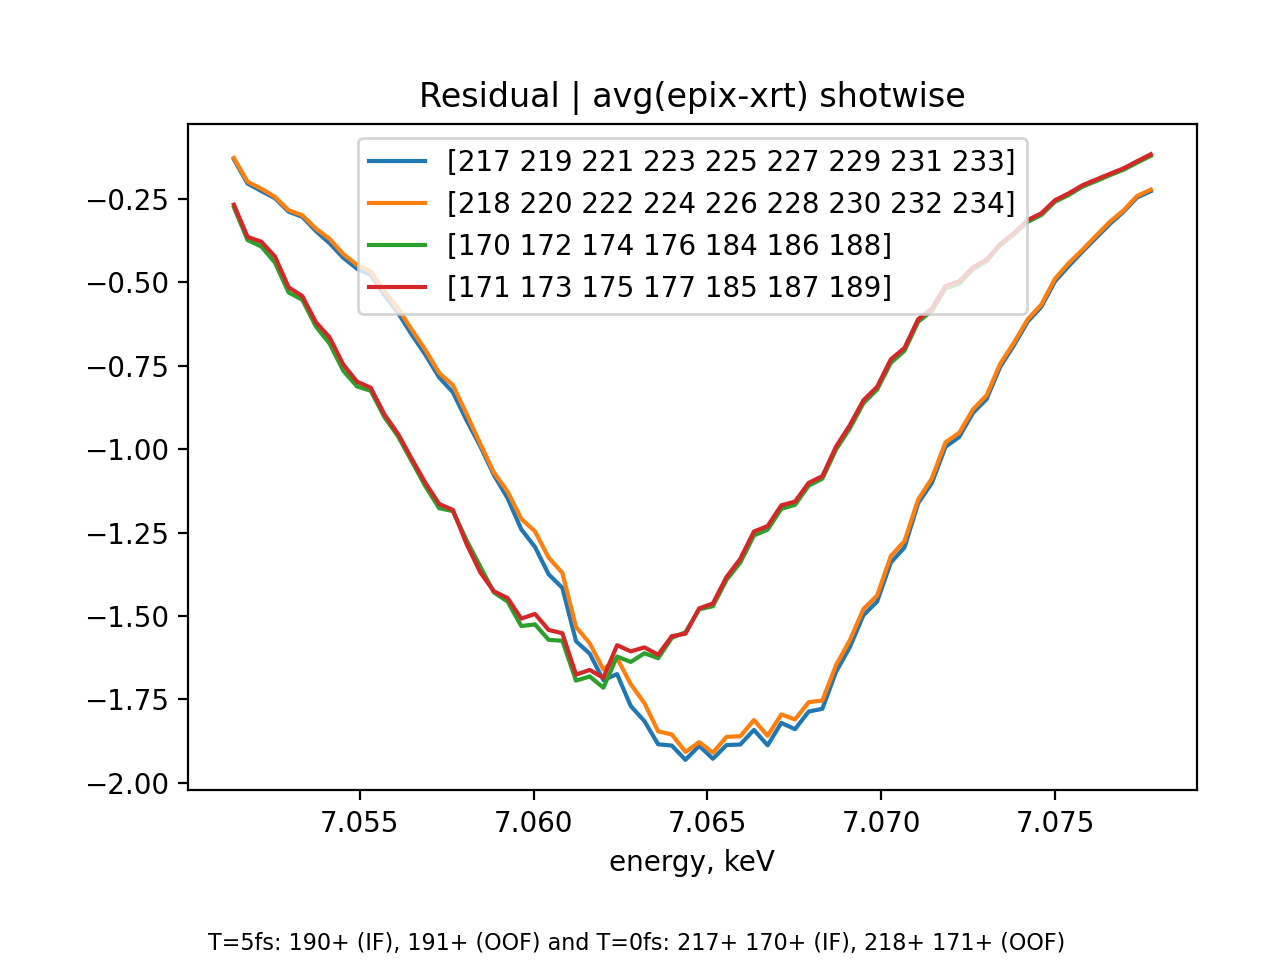

<IPython.core.display.Javascript object>


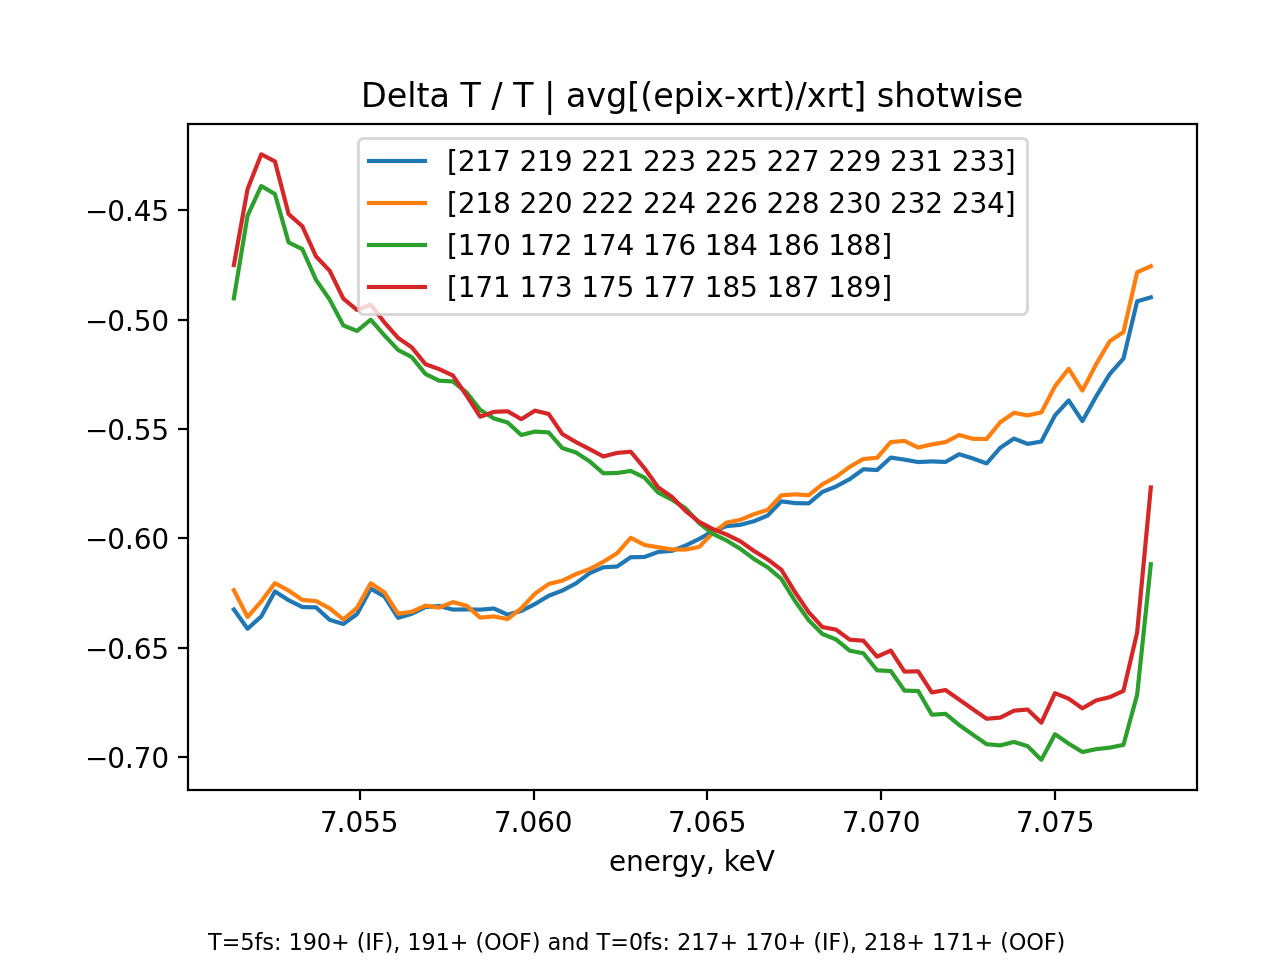

In [2]:
### Create sets of variables to compare different calibration runs
# sorted(scans_to_plot,key=len())
txt2 = 'T=5fs: 190+ (IF), 191+ (OOF) and T=0fs: 217+ 170+ (IF), 218+ 171+ (OOF) '

set_0 = [190,192,194,196,198,200,202,204] # 5 fs in focus
set_1 = [191,193,195,197,199,201,203,205] # 5 fs out of focus
# set_0 = [178,179,180] # in focus with foil
# set_1 = [181,182,183] # out of focus with foil
# set_2 = [170,172,174,176,184,186,188] # in focus
# set_3 = [171,173,175,177,185,187,189] # out of focus
# set_2 = []
spec_cal_runs = [[206,207,208]]  # Select runs with no sample in line
scans_to_plot = set_0,set_1#,set_2,set_3   #These runs will plot first
scans_to_plot = sorted(scans_to_plot,key=len)

set_0_comp = [217,219,221,223,225,227,229,231,233] #in focus
set_1_comp = [218,220,222,224,226,228,230,232,234] #out of focus
# set_2_comp = []
spec_cal_runs_comp = [[216]]  # Select runs with no sample in line for comparison
scans_to_plot_comp = set_0_comp,set_1_comp,#set_2_comp   #These runs will plot second
scans_to_plot_comp = sorted(scans_to_plot_comp,key=len)

set_0_comp2 = [170,172,174,176,184,186,188] # in focus
set_1_comp2 = [171,173,175,177,185,187,189] # out of focus
# set_2_comp = []
spec_cal_runs_comp2 = [[166,167]]  # Select runs with no sample in line for comparison
scans_to_plot_comp2 = set_0_comp2,set_1_comp2,#set_2_comp2   #These runs will plot Third
scans_to_plot_comp2 = sorted(scans_to_plot_comp2,key=len)

plot_conds = [True,True,True,True] # epix, xrt, resid, deltaT_T
plot_meanwise = True                 # deltaT_T like avg(epix)-avg(xrt))/avg(xrt)
plot_shotwise = True                  # deltaT_T like avg[(epix-xrt)/xrt] shot by shot
bootstrap = [False,50,1/3]            # how many loops, and what random fraction of data per loop


#################################      DON'T WORRY ABOUT THE LINES UNDER THIS ##################################
if type(scans_to_plot_comp) is list:
    scans_to_plot_comp = np.asarray(scans_to_plot_comp)[np.newaxis,:]
# print(type(scans_to_plot))
runs_comp = np.append(np.concatenate(spec_cal_runs_comp),np.concatenate(scans_to_plot_comp))
runs_comp = runs_comp.tolist()
scans_to_plot_comp=np.squeeze(scans_to_plot_comp)
pro_datas1 = load_pro.load_pro(runs_comp)

if type(scans_to_plot_comp2) is list:
    scans_to_plot_comp2 = np.asarray(scans_to_plot_comp2)[np.newaxis,:]
# print(type(scans_to_plot))
runs_comp2 = np.append(np.concatenate(spec_cal_runs_comp2),np.concatenate(scans_to_plot_comp2))
runs_comp2 = runs_comp2.tolist()
scans_to_plot_comp2 = np.squeeze(scans_to_plot_comp2)
pro_datas2 = load_pro.load_pro(runs_comp2)

### create next set of vars

if type(scans_to_plot) is list:
    scans_to_plot = np.asarray(scans_to_plot)[np.newaxis,:]
runs = np.append(np.concatenate(spec_cal_runs),np.concatenate(scans_to_plot))
runs = runs.tolist()
spec_cal_runs
scans_to_plot = np.squeeze(scans_to_plot)
pro_datas0 = load_pro.load_pro(runs)

input_vars = [scans_to_plot_comp,spec_cal_runs_comp,runs_comp,scans_to_plot_comp2,spec_cal_runs_comp2
              ,runs_comp2,scans_to_plot,spec_cal_runs,plot_conds,plot_shotwise,plot_meanwise,runs,bootstrap]
pro_datas = [pro_datas0,pro_datas1,pro_datas2]

comp_plot_pro.plot_lots_comp(pro_datas,input_vars,txt2)


# if type(scans_to_plot_comp) is list:
#     scans_to_plot_comp = np.asarray(scans_to_plot_comp)[np.newaxis,:]
# # print(type(scans_to_plot))
# runs_comp = np.append(np.concatenate(spec_cal_runs_comp),np.concatenate(scans_to_plot_comp))
# runs_comp = runs_comp.tolist()
# input_vars1 = [scans_to_plot_comp,spec_cal_runs_comp,plot_conds,plot_shotwise,plot_meanwise,runs_comp,bootstrap]
# pro_datas1 = load_pro.load_pro(runs_comp)

# if type(scans_to_plot_comp2) is list:
#     scans_to_plot_comp2 = np.asarray(scans_to_plot_comp2)[np.newaxis,:]
# # print(type(scans_to_plot))
# runs_comp2 = np.append(np.concatenate(spec_cal_runs_comp2),np.concatenate(scans_to_plot_comp2))
# runs_comp2 = runs_comp2.tolist()
# input_vars2 = [scans_to_plot_comp2,spec_cal_runs_comp2,plot_conds,plot_shotwise,plot_meanwise,runs_comp2,bootstrap]
# pro_datas2 = load_pro.load_pro(runs_comp2)

# ### create next set of vars

# if type(scans_to_plot) is list:
#     scans_to_plot = np.asarray(scans_to_plot)[np.newaxis,:]
# runs = np.append(np.concatenate(spec_cal_runs),np.concatenate(scans_to_plot))
# runs = runs.tolist()
# spec_cal_runs
# input_vars = [scans_to_plot,spec_cal_runs,plot_conds,plot_shotwise,plot_meanwise,runs,bootstrap]
# pro_datas = load_pro.load_pro(runs)



# comp_plot_pro.plot_lots_comp(pro_datas1,input_vars1,pro_datas,input_vars,txt2,pro_datas2,input_vars2)

In [3]:
# print((str(scans_to_plot[i]) for i in range(0,len(scans_to_plot))))#+' calibration: ')
i = 1
txt = ([((str(scans_to_plot[i]))) for i in range(0,len(scans_to_plot))], 'hello')
print(txt)

(['[190 192 194 196 198 200 202 204]', '[191 193 195 197 199 201 203 205]'], 'hello')
